# Baseball Case Study

#### Problem Statement:

This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

-- Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors

-- Output: Number of predicted wins (W)

# Importing the libraries

In [1]:
! pip install autoviz -q
! pip install tabulate -q

     |████████████████████████████████| 44 kB 1.5 MB/s 


In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import ARDRegression

from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from scipy.stats import zscore
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Loading the Dataset


In [3]:

df = pd.read_csv("baseball.csv")
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


### Shape of the dataset

The dataset appears to have a total of 30 rows and 17 columns including 1 target column

In [4]:
df.shape

(30, 17)

# Preporcessing

### The dataset appears to have all the information intact and as 30 non null out of 30 rows.



### All the columns in this dataset have "int" datatype including the target variable "W" (Wins) and once 1 feature having "float" datatype

#### We can also see at the file size of this dataset which is 4.1 KB in this case

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


# Let's now observe the stats of the dataset

### All the values are accounted for and has no missing values

#### Difference between mean and std also seems fine . However we will check for skewness if any in the further steps

##### We can see the columns "W",  "3B", "SB", "CG", "SHO" have more deviation than the other columns as the difference between the mean and std is high compared to other columns.

##### We can also see there are some outliers and its evident in the coumns "H", "HR", "BB",  "SO", "SB", "RA", "ER", "CG", "SHO", "E".

##### We will try to reduce the outliers in the further steps

In [6]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


# Explore the dataset with Autoviz

#### The following library helps in analyzing the dataset ti give us some understanding on individual features

#### The column ERA appears to be normally distributed and also appears to have an outlier.
#### When it comes to probability plot, the data seems to be nearly linear in nature

In [7]:
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()

Imported AutoViz_Class version: 0.0.83. Call using:
    AV = AutoViz_Class()
    AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)
Note: verbose=0 or 1 generates charts and displays them in your local Jupyter notebook.
      verbose=2 does not show plot but creates them and saves them in AutoViz_Plots directory in your local machine.


Shape of your Data Set loaded: (30, 17)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  1
    Number of Integer-Categorical Columns =  14
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  2
    Number of Columns to Delete =  0
    17 Predictors classified...
        This does not include the Target column(s)
        2 variables removed since they were ID or low-information variables
Since Number of Rows in data 30 exceeds maximum, randomly sampling 30 rows for EDA...


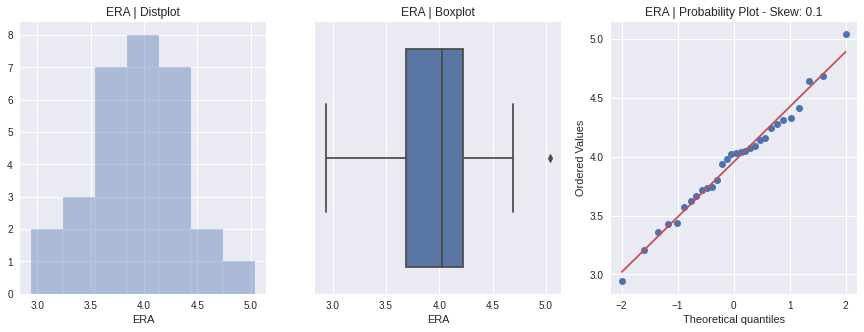

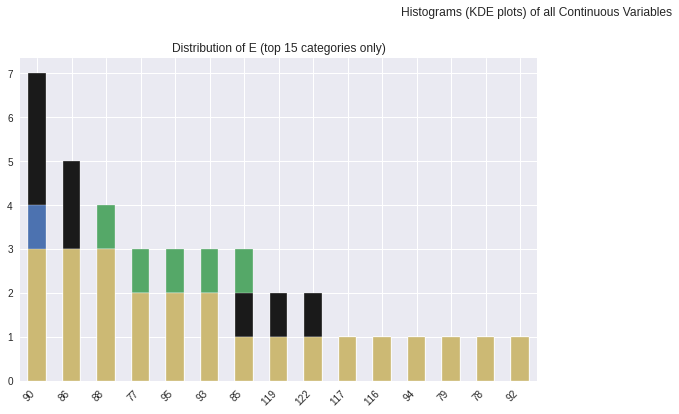

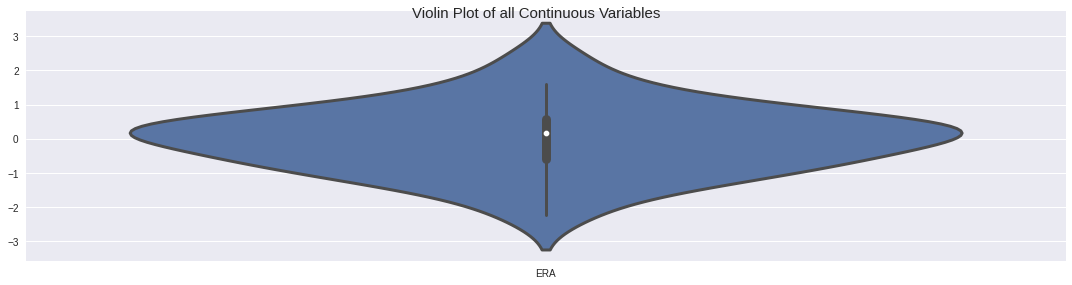

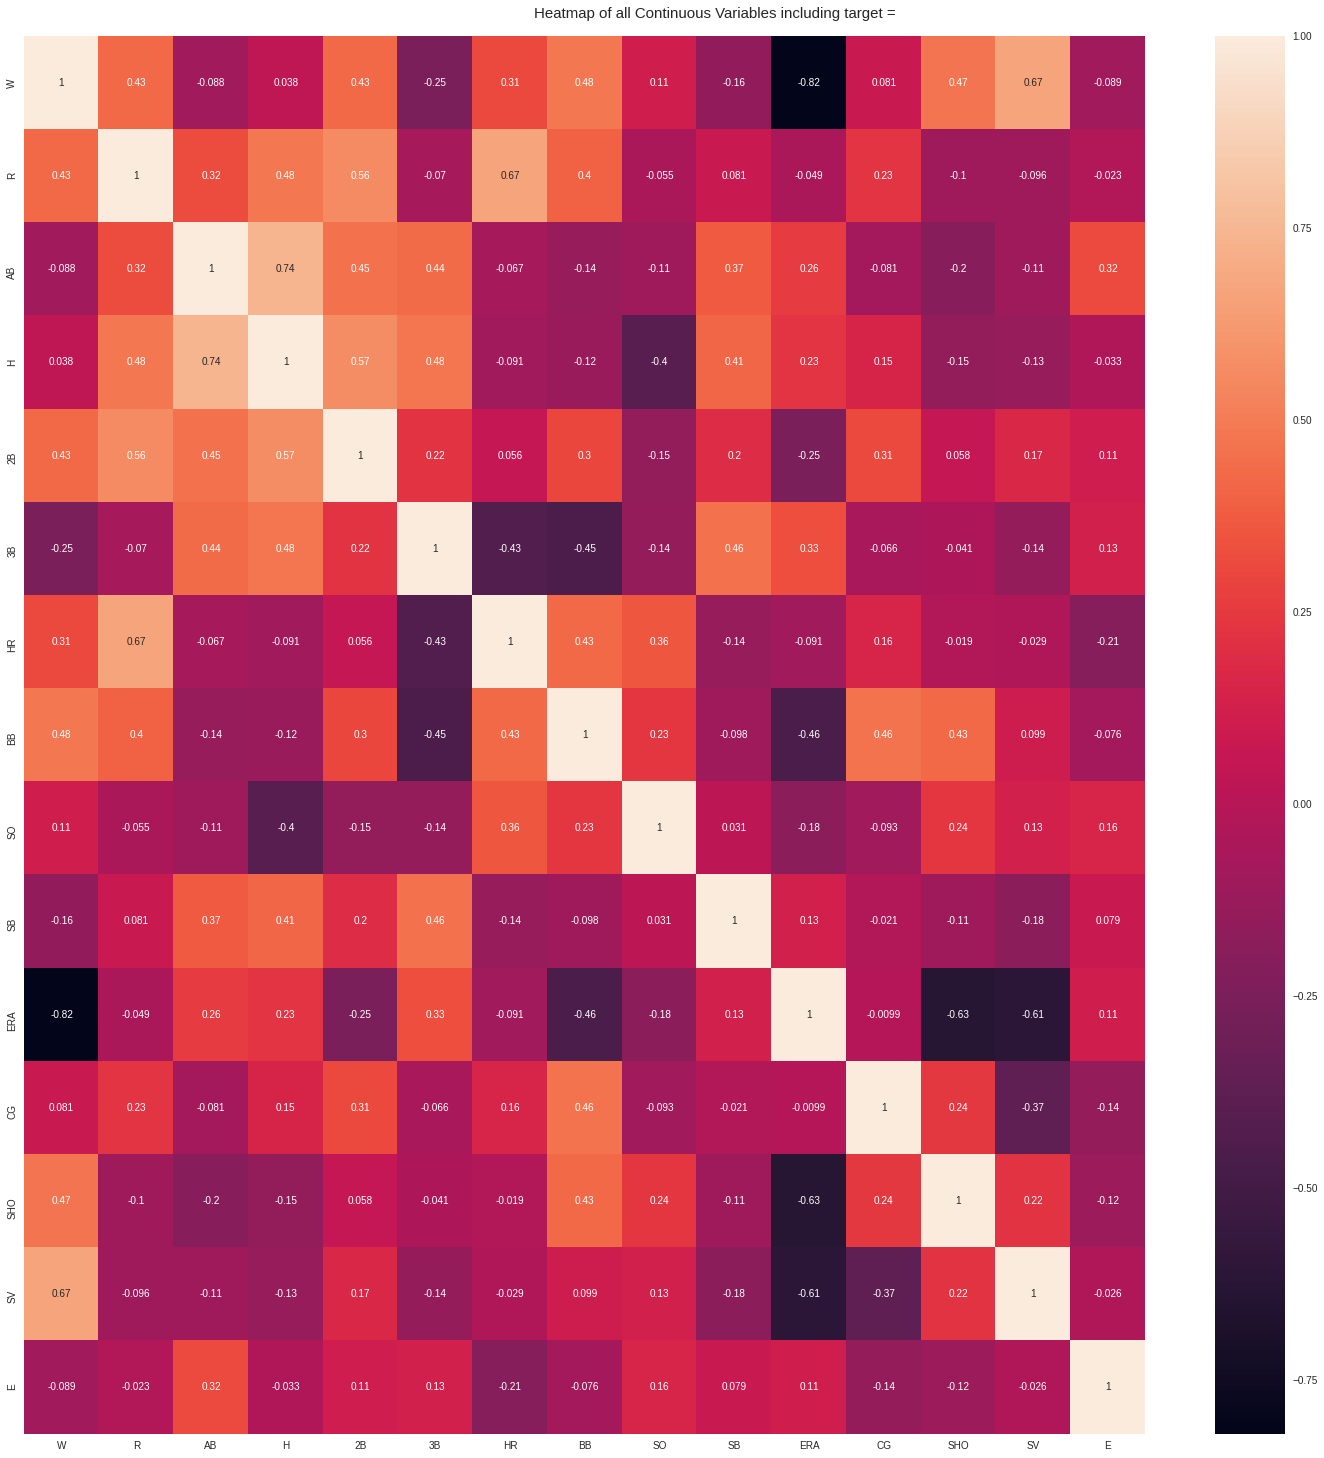

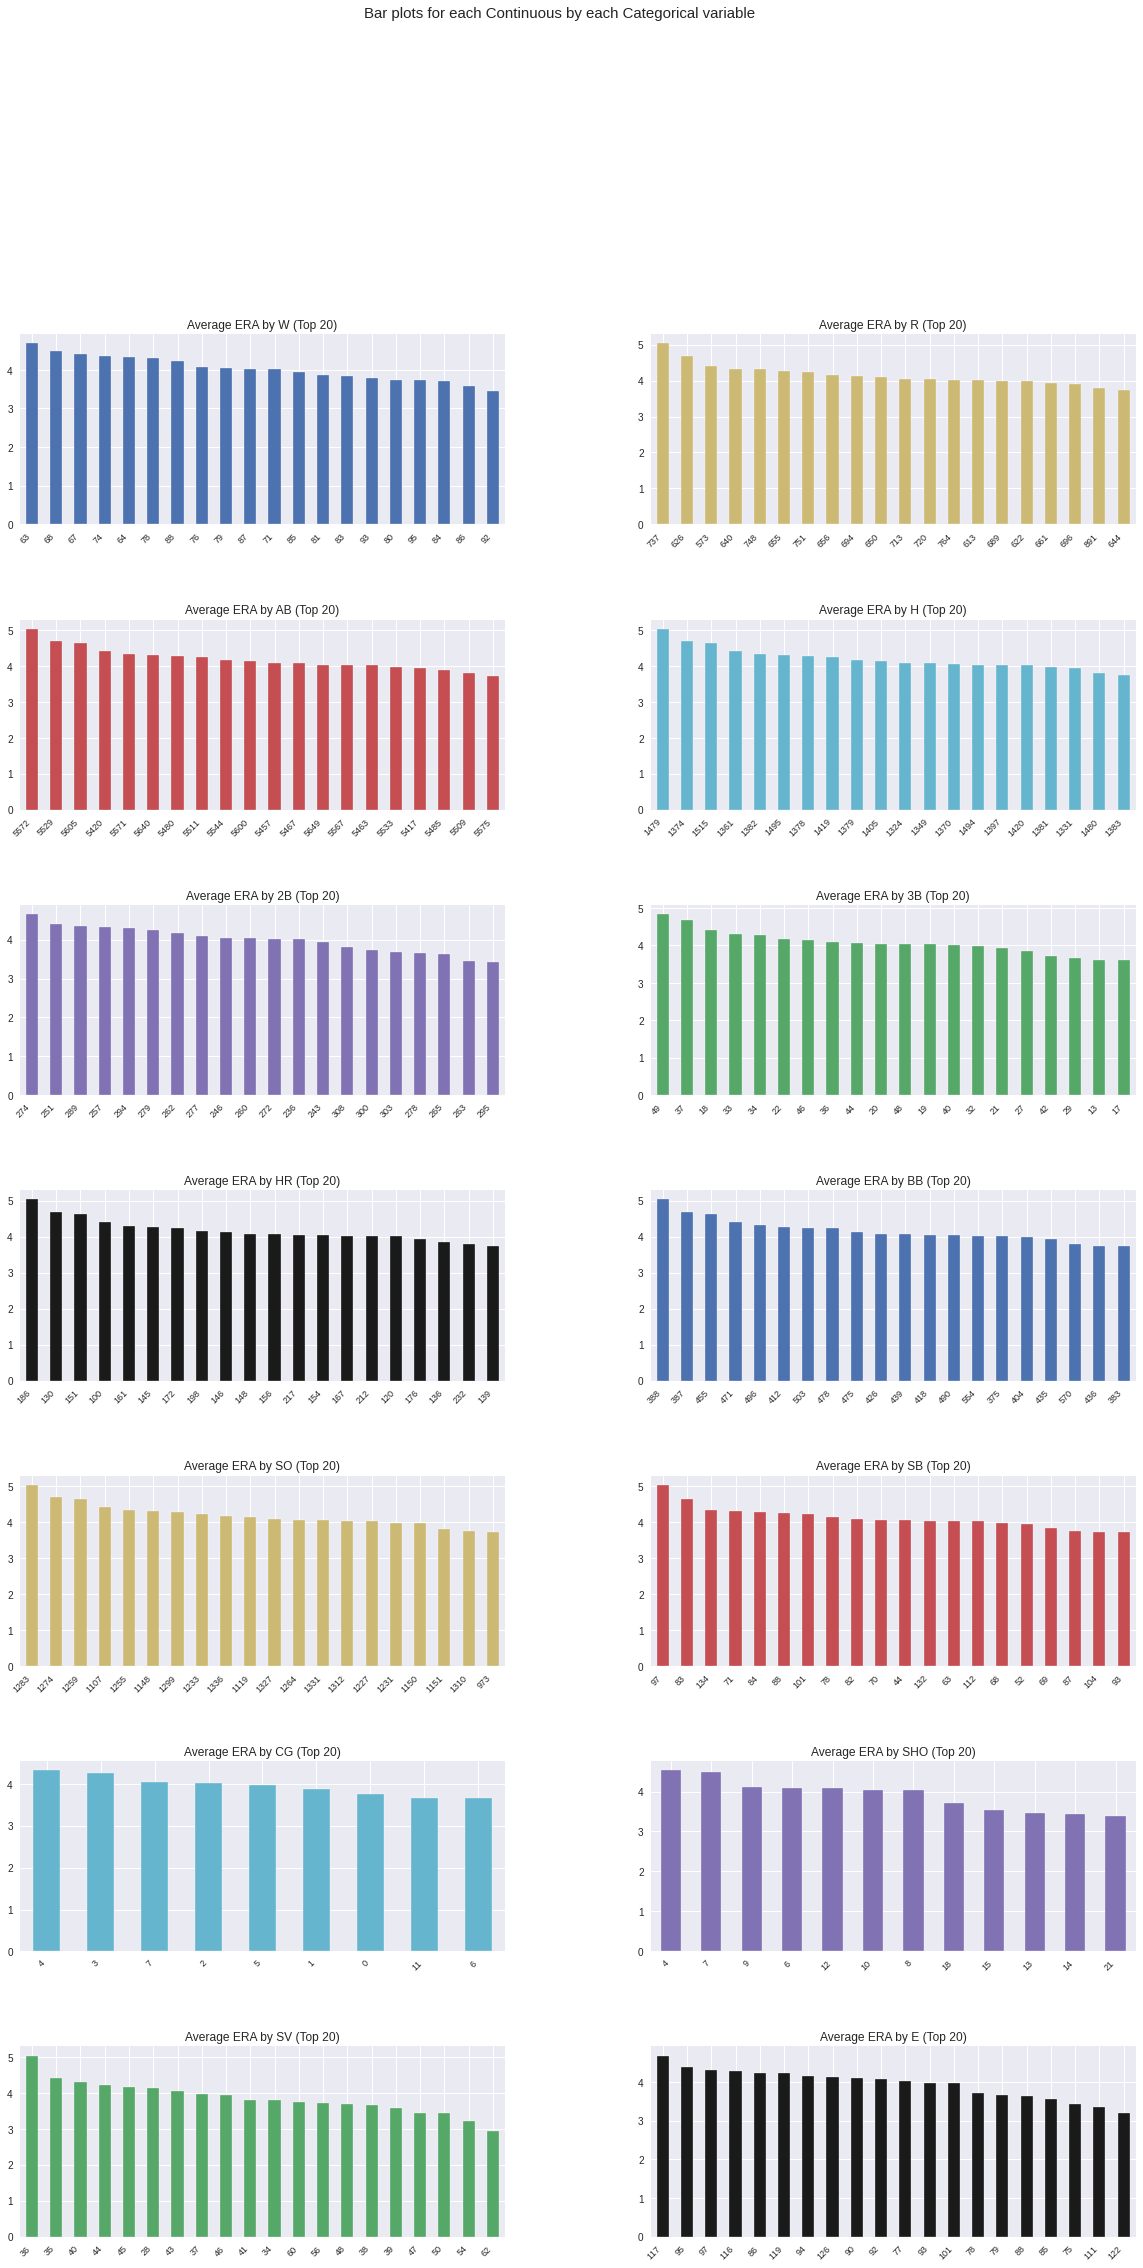

Time to run AutoViz (in seconds) = 8.074

 ###################### VISUALIZATION Completed ########################


In [9]:
dft = AV.AutoViz("baseball.csv", sep=",", depVar="", dfte=None, header=0, verbose=0,
                lowess=False, chart_format="svg", max_rows_analyzed=30, max_cols_analyzed=17)

# Lets plot a couple of plots for further understanding

#### From the below graph we can observe that "R" (Runs) and "E" (Errors)

#### In this game, there are chances of getting Runs because of Errors committed by Fielders.
#### Errors include poor play from fielder that may result in the batsman get extra runs.

#### We can see from the graph that the highest runs are 694 and the error is 120. This shows a relation with each other and there is a possibility that these runs may also have included the mistakes like dropping the ball, throwing a foul ball throw move, etc. resulting in increasing Runs for "at - bat"

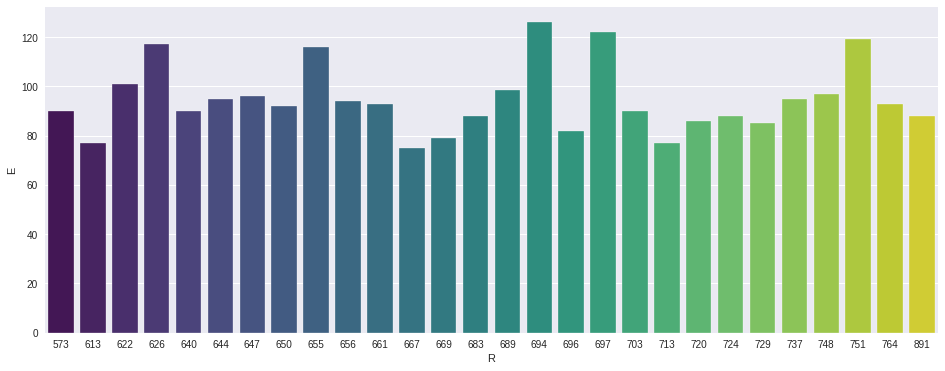

In [10]:
plt.figure(figsize=(16, 6))
ax = sns.barplot(x="R", y="E", data=df, palette="viridis", ci=None)


#### At-bats are almost equally high for the amount of Runs scored. In this game, any player who bats higher will end up with more "at-bats" compared to the other players. 

#### In this case also, error from fielder may have helped in creating changes in runs resulting in the increase in "at-bats"

#### The follwing team has performed well enough in getting runs consistently.


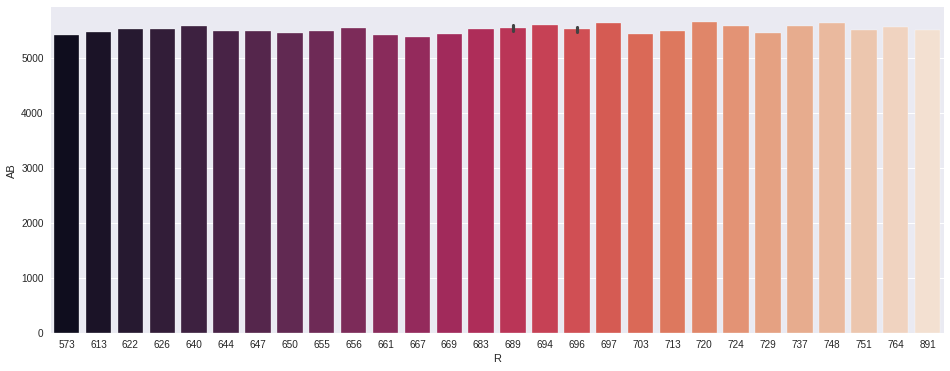

In [11]:
plt.figure(figsize=(16, 6))
ax = sns.barplot(x="R", y="AB", data=df, palette="rocket")

#### The following jointplot shows us the direct relation between the "Hits" and "Runs" of the player

#### We can see clearly from the graph majority of the errors that are approximately 110 to 120 have occured between 1300 to 1500 Hits which resulted in getting maximum runs between 600 to 800

#### However in general, the lowest value of Error is 80 and it appears within the same range multiple times.

#### We can conclude that Errors happen often and overall it is less compared to the previous observation

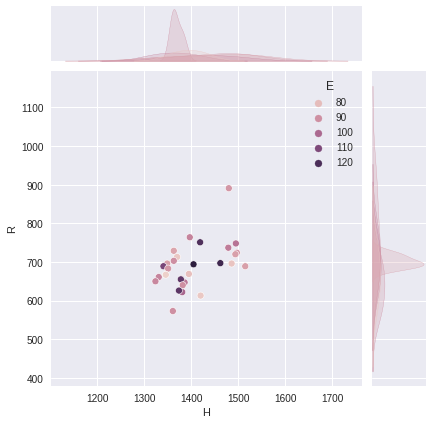

In [12]:
sns.jointplot(data=df, x="H", y="R", hue="E")

#### The following graph shows us the amount of double runs a player (at-bat) has scored.

#### In the game sof baseball, a batter / player is granted with a double run when he reaches second base after he hits the ball into play without an error or with a minimal amount of error

#### We can see over here that more than 300 double runs have been achieved for 5509 at-bats

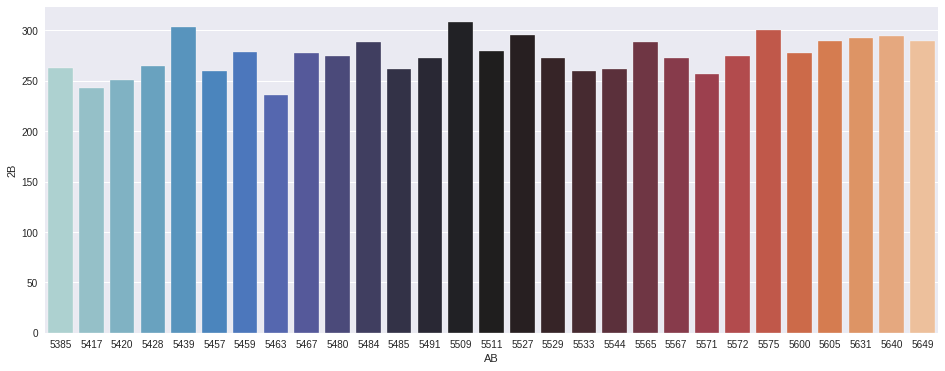

In [13]:
plt.figure(figsize=(16, 6))
ax = sns.barplot(x="AB", y="2B", data=df, palette="icefire", orient="v", ci=None)

#### This graph is a mixture of both bar graph and an error in the form of a line graph
#### Apart from a very few scenarios as shown below, the number of Hits resulting in double runs with less error ending up reaching 2nd base.
#### The Error lines seems to pass in the middle for majority of the points.

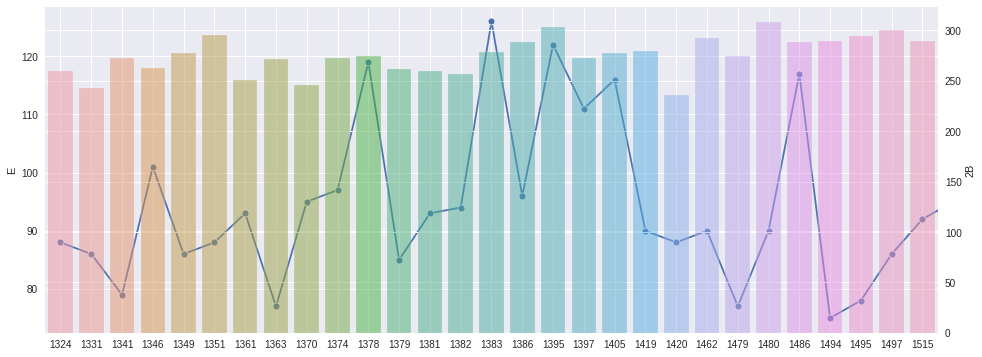

In [14]:
fig, ax1 = plt.subplots(figsize=(16,6))

sns.lineplot(data = df['E'], marker='o', sort = False, ax=ax1)
ax2 = ax1.twinx()

sns.barplot(data = df, x='H', y='2B', alpha=0.5, ax=ax2, ci=None)

#### This graph is a mixture of both bar graph and an error in the form of a line graph
#### In this scenario Errors seems to surpass or appear at nearest tip in relation to the Triple runs scored (3B) in the game.
#### The Error lines seems to pass in the middle for majority of the points.

#### The Triple is also referred to as one of the most exciting play in baseball. This is possible if the batter reaches the 3rd base with less errors.

#### Since 3rd base is far from the actual point of Hit. It also indicates the player must be able to reach the desired base as fast as possible to avoid being out. 

#### The players in this case have not been able to reach 3rd base with less errors which is an ideal practice in this game

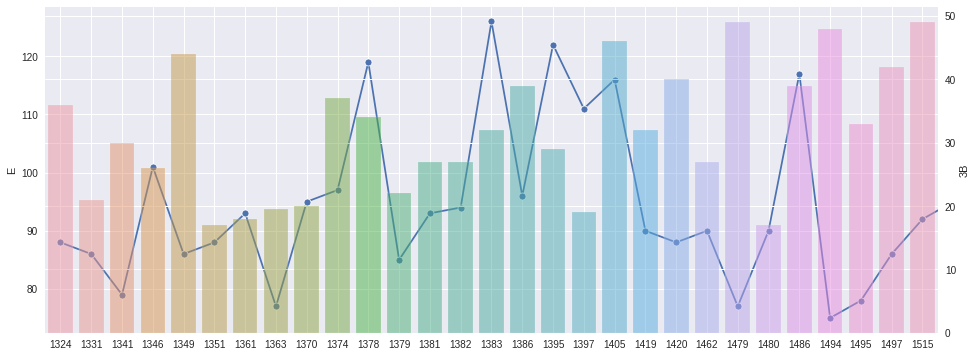

In [15]:
fig, ax1 = plt.subplots(figsize=(16,6))

sns.lineplot(data = df['E'], marker='o', sort = False, ax=ax1)
ax2 = ax1.twinx()

sns.barplot(data = df, x='H', y='3B', alpha=0.5, ax=ax2, ci=None)

#### Complete games occur if the pitcher completes the whole game irrespective of time taken.
#### It can also be achieved by unprcedented events like match shortened by rain or if extra innings lasts.

#### We can see that there has been atleast 1 Complete Game that occured in  Major League Baseball 2014 seasons which is a good sign to observe

#### Complete games also ensures the whole team could be at rest as the entire innings are completed


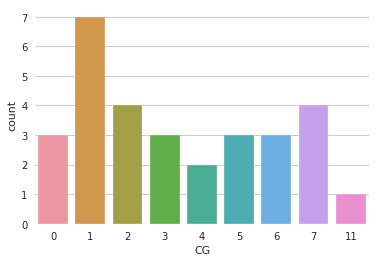

In [16]:
sns.set_style("whitegrid")
sns.countplot(x="CG", data=df)

#### A shutout (a complete game with no runs allowed) occurs when a Complete Game is played irrespectve of time taken
#### We can observe there has been atleast 6 Complete Games that have reached the end of match with 17 shutouts

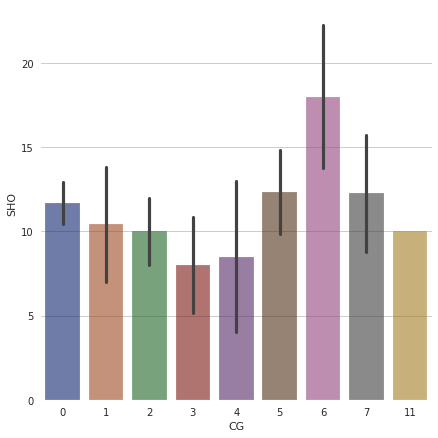

In [17]:
g = sns.catplot(
    data=df, kind="bar",
    x="CG", y="SHO", 
    ci="sd", palette="dark", alpha=.6, height=6
)

#### A walk (or base on balls) occurs in a game when a pitcher throws four pitches out of the zone of strike, and the hitter intententionally misses it

#### From the below graph we can we can see that atleast 11 Complete Games have had about 500+ Walks.

#### This also connects us to the previous graphs as walks result in Errors from thye pitcher side and the batter is at an advantage

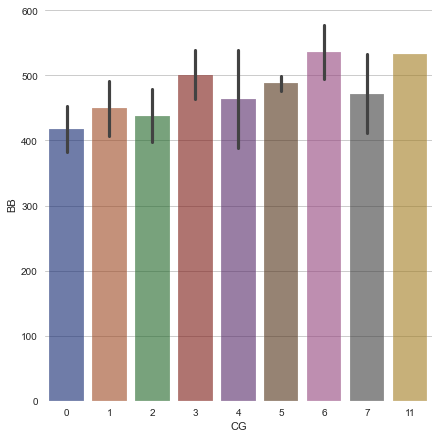

In [ ]:
g = sns.catplot(
    data=df, kind="bar",
    x="CG", y="BB", 
    ci="sd", palette="dark", alpha=.6, height=6
)

#### A strikeout (SO) happens if the pitcher gets the batter out within 3 strikes / throws

#### From the below scatter plot we can observe that most of the strike outs have happend in a range between 1350 to 1400 Hits.

#### But as the number of Hits increase the Strikeouts also decrease.

#### It is possible that Strikeouts happen due to non familiarity of the field as there are multiple teams playing and once the team is settled in play the games improves with more Hits

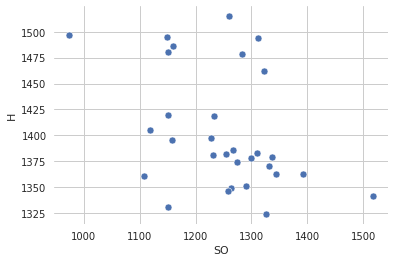

In [25]:
sns.scatterplot(data=df, x="SO", y="H")

#### This graph is a mixture of both bar graph and an error in the form of a line graph

#### An earned run is any run that scores against a pitcher without the benefit of an error or a passed ball. Often, it is the judgment of the official scorer as to whether a specific run would've scored without the defensive mishap. If a pitcher exits a game with runners on base, any earned runs scored by those runners will count against him.

#### Earned run average represents the number of earned runs a pitcher allows per nine innings.


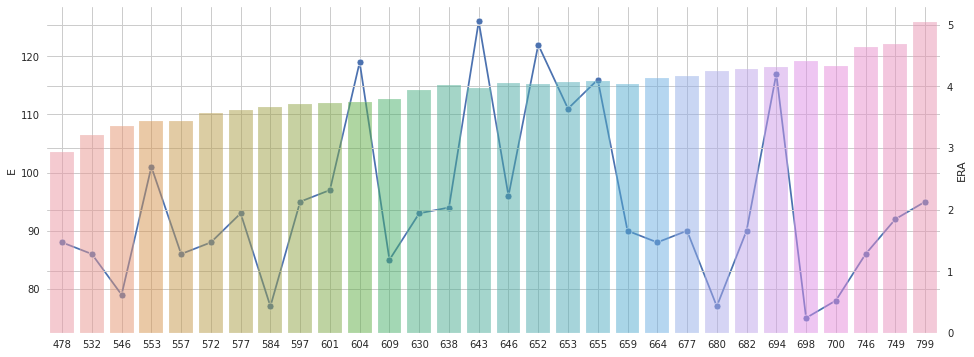

In [26]:
fig, ax1 = plt.subplots(figsize=(16,6))

sns.lineplot(data = df['E'], marker='o', sort = False, ax=ax1)
ax2 = ax1.twinx()

sns.barplot(data = df, x='ER', y='ERA', alpha=0.5, ax=ax2, ci=None)

#### The following graph shows us the "wins" with "Errors".
#### We can see that there have been 98 wins there is approximately 119 Errors

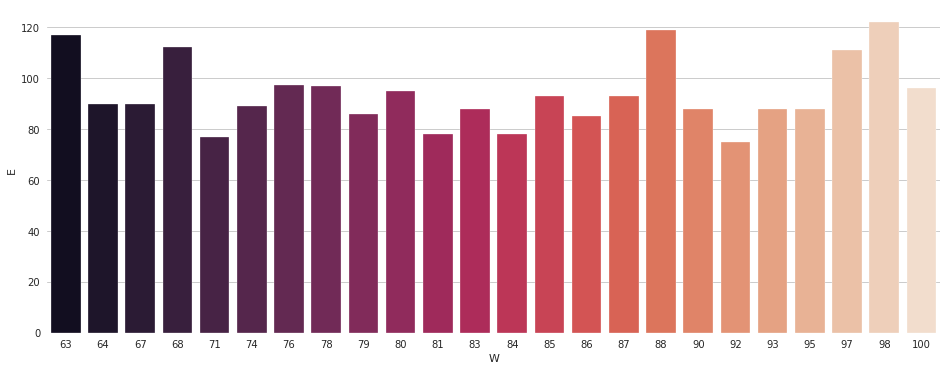

In [27]:
plt.figure(figsize=(16, 6))
ax = sns.barplot(x="W", y="E", data=df, palette="rocket", ci=None)

# Distribution of all the columns in the dataset


### All the features seem to be a little less normal distributed. So let us try to identify and remove outliers to check if the output can be imporved

#### We can see the output / target variable "W" is normally distributed.
#### Rest all the features seem to be less normal distributed 

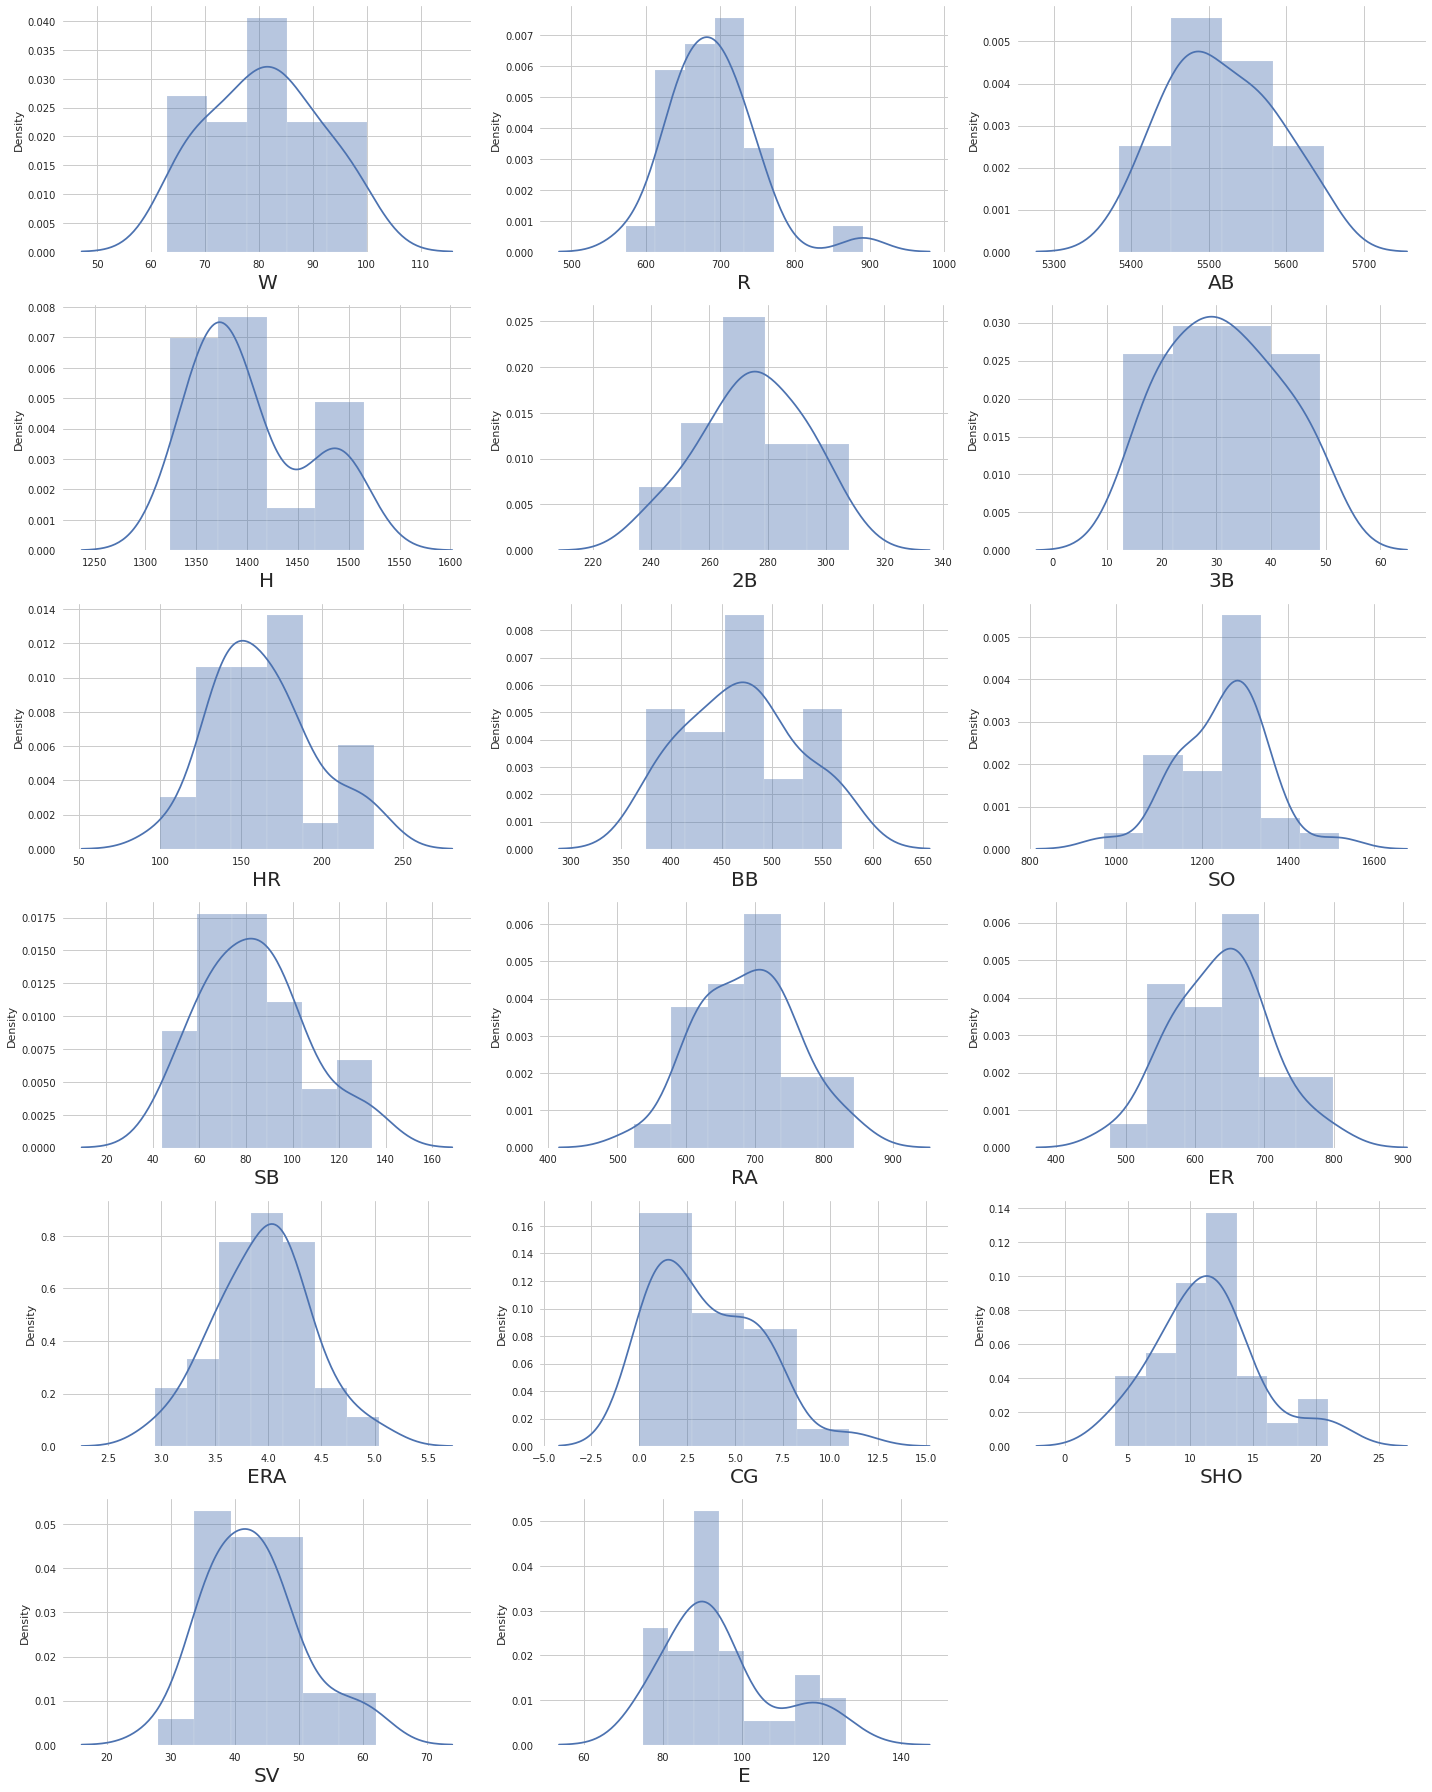

In [28]:
# let us now see the distribution of the dataset we have

plt.figure(figsize=(20,25), facecolor="white")
plotnumber = 1

for column in df:
    if plotnumber <=17:
        ax = plt.subplot(6,3, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize=20)
    plotnumber+=1
plt.tight_layout()

### Identifying the column names to pass it for outlier removal

In [29]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

# Applying Z-score to identify and remove outliers

### It appears the dataset has removed / reduced outliers to some extent

### The stats show reduction of total values in the dataset to minimal extent only

#### We can still see outliers in columns "E" and "SHO" but overall the difference between mean and std looks fine.

#### Also the values of Quartiles appears to gradually increase which looks fine 

In [30]:
from scipy.stats import zscore

z_score = zscore(df[['R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER', 'ERA', 'CG', 'SHO', 'SV', 'E']])
abs_zscore = np.abs(z_score)

filtering_entry = (abs_zscore < 3).all(axis=1)

df = df[filtering_entry]



# the data now seems much better than before.

df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,80.551724,681.241379,5516.517241,1400.896552,273.586207,31.793103,161.275862,465.620690,1251.551724,83.344828,688.862069,636.758621,3.961724,3.344828,11.344828,43.379310,94.551724
std,10.384006,45.357040,71.701076,56.264265,17.269952,10.276114,29.600792,54.728821,103.930123,23.202949,73.300616,71.195734,0.461148,2.729153,4.185655,7.816712,14.153713
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.000000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,650.000000,5463.000000,1363.000000,262.000000,26.000000,140.000000,426.000000,1159.000000,69.000000,635.000000,584.000000,3.670000,1.000000,9.000000,38.000000,86.000000
50%,81.000000,689.000000,5511.000000,1382.000000,274.000000,32.000000,156.000000,471.000000,1264.000000,83.000000,698.000000,646.000000,4.030000,3.000000,12.000000,43.000000,92.000000
75%,87.000000,713.000000,5571.000000,1420.000000,288.000000,39.000000,177.000000,496.000000,1312.000000,97.000000,733.000000,680.000000,4.240000,5.000000,13.000000,47.000000,97.000000
max,100.000000,764.000000,5649.000000,1515.000000,303.000000,49.000000,230.000000,567.000000,1518.000000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


### Percentage of Data Loss

#### It is told that if the data loss is more than 7 to 8%, we may not get accurate results. In this case its approximately 3.33 % and not much of data is lost

In [31]:
# Percentage data loss:

loss_percent = (30-29)/30*100
print(loss_percent)

3.3333333333333335


# Distribution of all the columns in the dataset (post z-score)

#### The dataset appears to be slightly normally distributed than before.

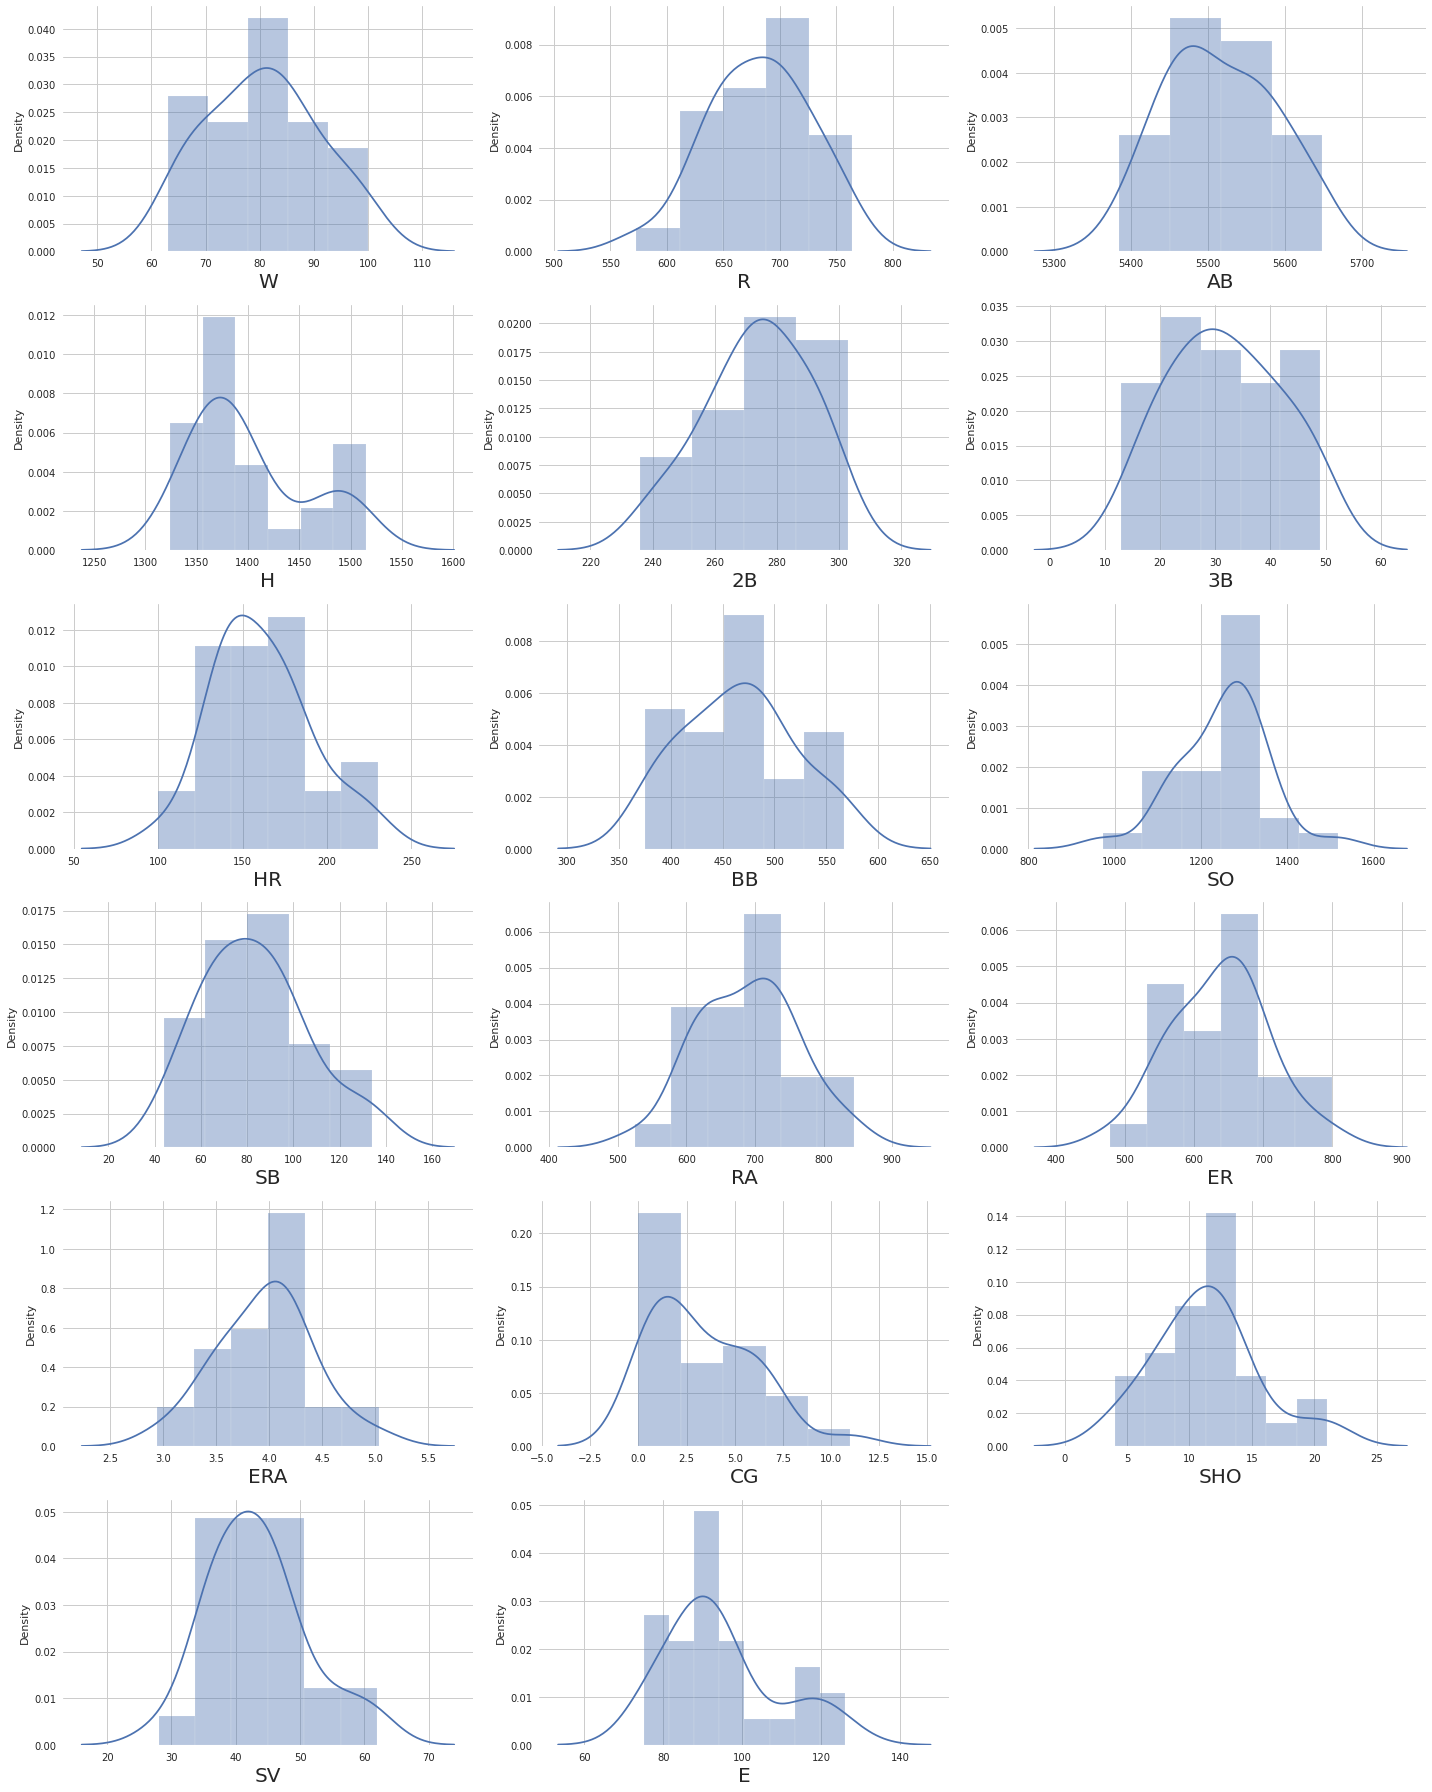

In [34]:
plt.figure(figsize=(20,25), facecolor="white")
plotnumber = 1

for column in df:
    if plotnumber <=17:
        ax = plt.subplot(6,3, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize=20)
    plotnumber+=1
plt.tight_layout()

## Correlation of the features with the dependent variable "W"

#### The values are high for most of the features and its show the high collinearity with each other
#### Features like "CG", "H", "E" snd "AB" have less correlation and all othe rfeatures have high correlation

In [35]:
corr_matrix = df.corr()
corr_matrix["W"].sort_values(ascending=False)

W      1.000000
SV     0.749290
SHO    0.497526
BB     0.447513
R      0.390451
2B     0.384886
HR     0.245697
SO     0.156469
CG     0.029594
H     -0.018360
E     -0.072858
AB    -0.085780
SB    -0.169503
3B    -0.206737
ER    -0.815308
RA    -0.823176
ERA   -0.826952
Name: W, dtype: float64

## Lets us now examine correlation using a "heatmap" for further clarification


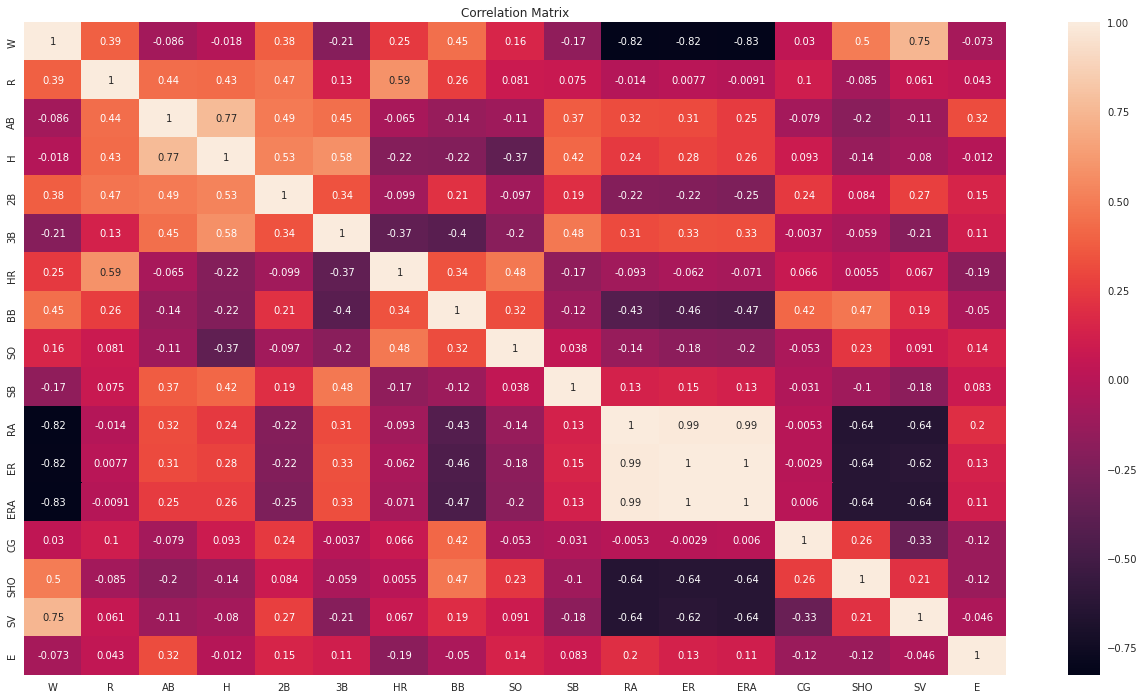

In [36]:
plt.figure(figsize=(22,12))
sns.heatmap(corr_matrix, annot=True)
plt.title("Correlation Matrix")
plt.show()

# Splitting up of dataset between x (features) and y (target column)

In [37]:
x = df.drop(columns = ["W"], axis=1)
y = df["W"]

### Check for skewness of data

#### The data is not skewed and it falls within the accepted range

#### Columns 'R', 'AB', 'H', '2B', 'HR', 'BB', 'SO', 'SB', 'CG', 'SHO', 'SV' and  'E' have skewness amongst each other.

#### Let's now proceed to further remove/ reduce the skewness for better results

In [38]:
x.skew()

R     -0.215364
AB     0.169573
H      0.783772
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG     0.854980
SHO    0.526943
SV     0.627480
E      0.840271
dtype: float64

# Storing the list of features having skewness in a variable "features". It's would be easier to pass it through at one go


In [39]:
features =['R', 'AB', 'H', '2B', 'HR', 'BB', 'SO', 'SB', 'CG', 'SHO', 'SV', 'E']

# Lets us now Scale the data for further processing.¶

#### we have used StandardScaler for further scaling up of data 

In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Power Transformer (yeo-Johnson)
To reduce the skewness to some extent, I have used a Power Transformer technique
Since we have both positive and negative values in skewness, I have used "Yeo-Johnson" technique

## The data is further standardized

In [41]:
from sklearn.preprocessing import PowerTransformer

scaler = PowerTransformer(method="yeo-johnson")

x[features] = scaler.fit_transform(x[features].values) 

x[features]

,R,AB,H,2B,HR,BB,SO,SB,CG,SHO,SV,E
0,0.962544,0.0,0.0,1.685188,-0.741927,-1.605198,-2.550612,0.936132,-0.307098,-0.787002,1.532753,-0.348265
1,0.298863,0.0,0.0,0.138198,-0.109958,-0.462096,0.093683,-0.516377,-0.307098,0.236737,0.312020,-0.540820
2,-0.312105,0.0,0.0,1.907385,-0.664354,1.232098,-0.935611,0.225038,2.011315,-0.252844,-0.664137,-1.326125
3,-1.308298,0.0,0.0,-0.837665,-0.860039,-1.162721,-0.230683,-0.618422,1.264463,-0.513555,-0.820689,0.650818
4,0.137737,0.0,0.0,0.911435,-0.289647,-0.155686,0.044143,0.095038,1.264463,0.236737,-1.149165,-0.540820
6,1.964209,0.0,0.0,-0.163010,1.631637,1.579494,-0.269583,-0.884526,0.121871,-2.064039,0.677176,0.082858
7,0.698146,0.0,0.0,-1.542635,1.767734,-0.877217,0.770980,-2.082843,-1.732896,-0.252844,0.052325,-1.588197
8,-0.852595,0.0,0.0,0.199897,0.269125,-0.520476,0.556008,0.267558,-0.870682,0.236737,1.908137,0.237592
9,1.555951,0.0,0.0,1.255256,0.065014,0.270944,-1.019210,-0.466233,0.121871,-0.252844,-0.365006,0.383386
10,1.631727,0.0,0.0,0.262086,0.434620,0.717576,-0.211199,0.824915,0.770649,-0.513555,0.312020,1.554265


# Check the skewness of the feature dataset
The skewness seems to have reduced considerably

In [42]:
x.skew()

R     -0.024842
AB     0.000000
H      0.000000
2B    -0.052793
3B     0.090124
HR     0.000448
BB    -0.008572
SO     0.051530
SB    -0.009570
RA     0.018155
ER     0.018461
ERA    0.016693
CG    -0.045947
SHO    0.000529
SV    -0.000925
E      0.065585
dtype: float64

# Distribution after skewness is removed

#### AB and H features seem to be completely symmetrical

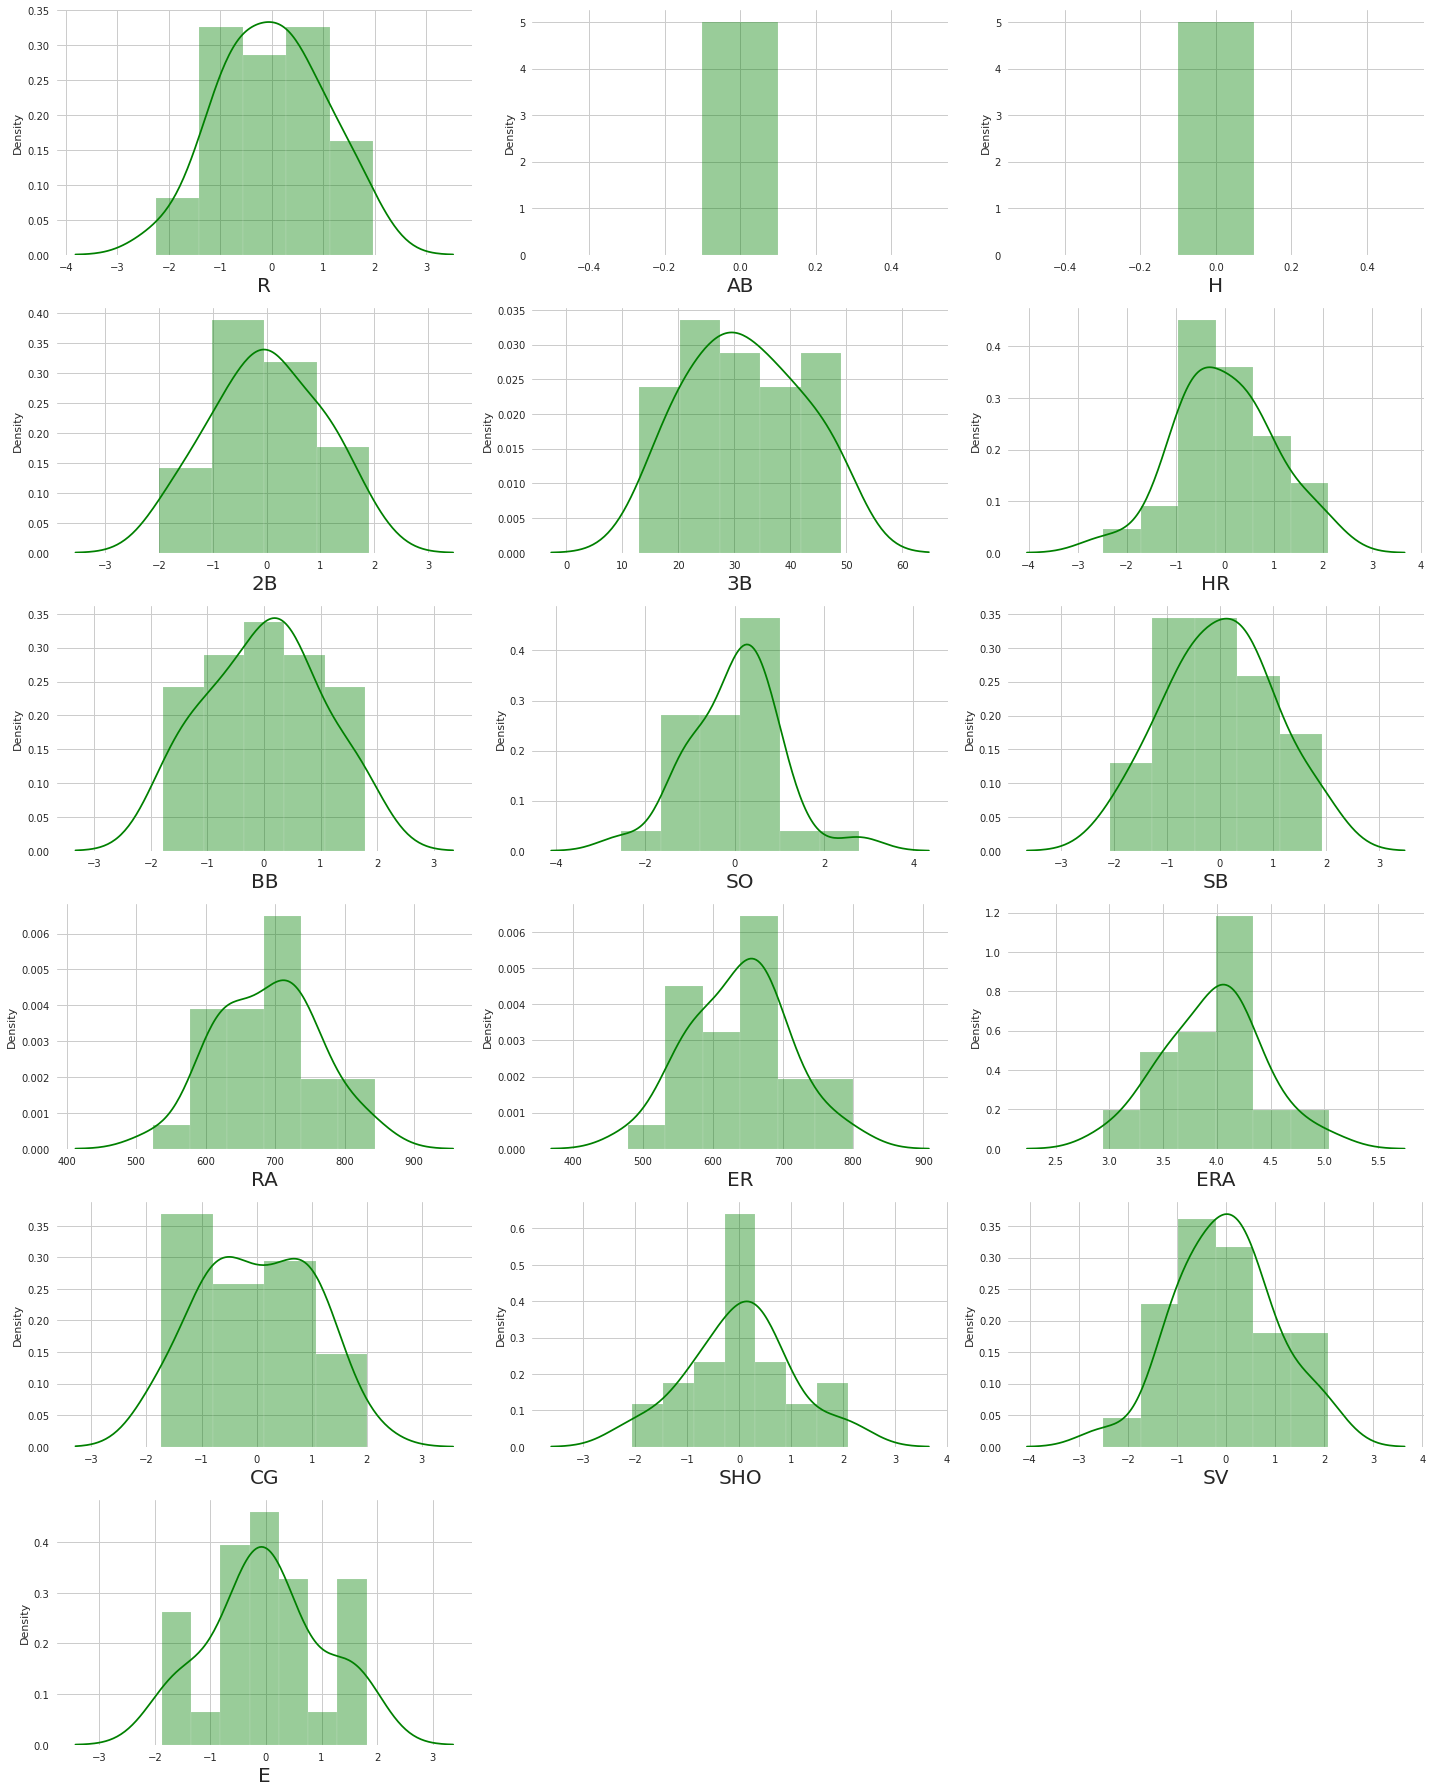

In [46]:
plt.figure(figsize=(20,25), facecolor="white")
plotnumber = 1

for column in x:
    if plotnumber <=17:
        ax = plt.subplot(6,3, plotnumber)
        sns.distplot(x[column], color="green")
        plt.xlabel(column, fontsize=20)
    plotnumber+=1
plt.tight_layout()

# Finding variance inflation factor in each scaled column¶
### This gives us relationship between feature vs feature and we can drop if necessary to avoid multicolinearity
### From the below observation, it appears all the columns have multicolinearity

### Columns "ERA" , "ER" and "RA" seems to have very high multicollinearity


In [47]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x_scaled, i) for i in range(x_scaled.shape[1])]
vif["Features"] = x.columns
vif

,vif,Features
0,7.229564,R
1,18.333377,AB
2,10.558458,H
3,3.743423,2B
4,3.278636,3B
5,8.426403,HR
6,3.431971,BB
7,2.720640,SO
8,2.110804,SB
9,197.315706,RA


### I have dropped these 2 columns to reduce multi-collinearity

#### It appears by dropping these 2 columns the output turnder out to be much better

In [48]:
x.drop(['ERA', 'RA'], axis=1, inplace=True)

### Use the scaled data once again to check variance inflation factor
#### The VIF is reduced and is within the acceptable range

In [49]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x_scaled, i) for i in range(x_scaled.shape[1])]
vif["Features"] = x.columns
vif

,vif,Features
0,3.751356,R
1,NaN,AB
2,NaN,H
3,2.476072,2B
4,2.907181,3B
5,4.394574,HR
6,2.683904,BB
7,2.225720,SO
8,1.590429,SB
9,3.692569,ER


# split the dataset into train and test data set

In [50]:

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.30, random_state = 200)


# Building Machine Learning Models

### Create multi output regression models



### 1) DecisionTreeRegressor

In [51]:
dt_reg = DecisionTreeRegressor()
dt_reg.fit(x_train,y_train)

y_pred = dt_reg.predict(x_test)

print("Adjusted R2 squared : ",dt_reg.score(x_train,y_train))
print("Mean Absolute Error (MAE): ", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE): ",mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE): ",np.sqrt(mean_squared_error(y_test, y_pred)))

Adjusted R2 squared :  1.0
Mean Absolute Error (MAE):  7.222222222222222
Mean Squared Error (MSE):  58.55555555555556
Root Mean Squared Error (RMSE):  7.6521601888326645


### 2) RandomForestRegressor

In [52]:
rf_reg = RandomForestRegressor()
rf_reg.fit(x_train,y_train)

y_pred = rf_reg.predict(x_test)

print("Adjusted R2 squared : ",rf_reg.score(x_train,y_train))
print("Mean Absolute Error (MAE): ", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE): ",mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE): ",np.sqrt(mean_squared_error(y_test, y_pred)))

Adjusted R2 squared :  0.9508161250514192
Mean Absolute Error (MAE):  7.585555555555555
Mean Squared Error (MSE):  83.6347
Root Mean Squared Error (RMSE):  9.145200927262342


### 3) XGBRegressor

In [53]:
import xgboost
xgb_reg = xgboost.XGBRegressor()
xgb_reg.fit(x_train,y_train)

y_pred = xgb_reg.predict(x_test)

print("Adjusted R2 squared : ",xgb_reg.score(x_train,y_train))
print("Mean Absolute Error (MAE): ", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE): ",mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE): ",np.sqrt(mean_squared_error(y_test, y_pred)))

[10:43:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Adjusted R2 squared :  0.9999394096002787
Mean Absolute Error (MAE):  7.3044543796115455
Mean Squared Error (MSE):  62.95130915230321
Root Mean Squared Error (RMSE):  7.934186105222338


### 4) AdaBoostRegressor

In [54]:
from sklearn.ensemble import AdaBoostRegressor

adb_reg = AdaBoostRegressor()
adb_reg.fit(x_train,y_train)

y_pred = adb_reg.predict(x_test)

print("Adjusted R2 squared : ",adb_reg.score(x_train,y_train))
print("Mean Absolute Error (MAE): ", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE): ",mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE): ",np.sqrt(mean_squared_error(y_test, y_pred)))

Adjusted R2 squared :  0.9902612793369096
Mean Absolute Error (MAE):  7.088888888888889
Mean Squared Error (MSE):  70.76987654320986
Root Mean Squared Error (RMSE):  8.412483375508677


### 5) KNeighborsRegressor

In [55]:
from sklearn.neighbors import KNeighborsRegressor

k_neigh = KNeighborsRegressor()
k_neigh.fit(x_train,y_train)

y_pred = k_neigh.predict(x_test)

print("Adjusted R2 squared : ",k_neigh.score(x_train,y_train))
print("Mean Absolute Error (MAE): ", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE): ",mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE): ",np.sqrt(mean_squared_error(y_test, y_pred)))

Adjusted R2 squared :  0.7038050185109008
Mean Absolute Error (MAE):  5.977777777777778
Mean Squared Error (MSE):  43.94222222222223
Root Mean Squared Error (RMSE):  6.628892986179685


### 6) LinearRegression

In [56]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(x_train,y_train)

y_pred = lin_reg.predict(x_test)

print("Adjusted R2 squared : ",lin_reg.score(x_train,y_train))
print("Mean Absolute Error (MAE): ", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE): ",mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE): ",np.sqrt(mean_squared_error(y_test, y_pred)))

Adjusted R2 squared :  0.9928155586977686
Mean Absolute Error (MAE):  6.431814776162297
Mean Squared Error (MSE):  81.56625824721198
Root Mean Squared Error (RMSE):  9.031404001992822


### 7) ARDRegression


In [57]:
from sklearn.linear_model import ARDRegression

ard_reg = ARDRegression()
ard_reg.fit(x_train,y_train)

y_pred = ard_reg.predict(x_test)

print("Adjusted R2 squared : ",ard_reg.score(x_train,y_train))
print("Mean Absolute Error (MAE): ", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE): ",mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE): ",np.sqrt(mean_squared_error(y_test, y_pred)))

Adjusted R2 squared :  0.9889834595248016
Mean Absolute Error (MAE):  6.6030657762996565
Mean Squared Error (MSE):  62.08331938718719
Root Mean Squared Error (RMSE):  7.879296884061876


# Cross validation to check if its overfitting

#### We have considered 5 CV values

In [58]:
from sklearn.model_selection import cross_val_score

In [59]:
scr = cross_val_score(dt_reg, x, y, cv=5)
print("Cross Validation score of DecisionTreeRegressor model is:", scr.mean())

Cross Validation score of DecisionTreeRegressor model is: -1.9978137681440686


In [60]:
scr = cross_val_score(rf_reg, x, y, cv=5)
print("Cross Validation score of RandomForestRegressor model is:", scr.mean())

Cross Validation score of RandomForestRegressor model is: -0.7060934864251059


In [61]:
scr = cross_val_score(xgb_reg, x, y, cv=5)
print("Cross Validation score of XGBoostRegressor model is:", scr.mean())

[10:44:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:44:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:44:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:44:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:44:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Cross Validation score of XGBoostRegressor model is: -0.6715826636447149


In [63]:
scr = cross_val_score(adb_reg, x, y, cv=5)
print("Cross Validation score of AdaBoostRegressor model is:", scr.mean())

Cross Validation score of AdaBoostRegressor model is: -0.7858556906782204


In [64]:
scr = cross_val_score(k_neigh, x, y, cv=5)
print("Cross Validation score of KNeighborsRegressor model is:", scr.mean())

Cross Validation score of KNeighborsRegressor model is: -0.9327268525131052


In [65]:
scr = cross_val_score(lin_reg, x, y, cv=5)
print("Cross Validation score of LinearRegression model is:", scr.mean())

Cross Validation score of LinearRegression model is: 0.41975779183764095


In [66]:
scr = cross_val_score(ard_reg, x, y, cv=5)
print("Cross Validation score of ARDRegression model is:", scr.mean())

Cross Validation score of ARDRegression model is: 0.5454801948268586


# Selecting the best ML model for this dataset

#### From the below, it appears ARDRegression is the appropriate algorithm for this scenario

#### The cross validation scores for all the algorithms gave us a negative value which means although it has a good score, the model is not fit for this dataset as the cross validation gives the proper accuracy.

#### Among LinearRegression and ARDRegression, the latter gave us slightly better accuracy than the former model


| Models used | Adjusted R2 score | CV score| Difference output |
| --- | --- | --- |---|
| DecisionTreeRegressor | 100 | -1.99781376814406 | 101.997813768144 |
| RandomForestRegressor | 0.950816125051419 | -0.706093486425105 | 1.65690961147652 |
| XGBoostRegressor | 0.999939409600278 | -0.671582663644714 | 1.67152207324499 |
| AdaBoostRegressor | 0.990261279336909 | -0.78585569067822 | 1.77611697001513 |
| KNeighborsRegressor | 0.7038050185109 | -0.932726852513105 | 1.63653187102401 |
| LinearRegression | 0.992815558697768 | 0.41975779183764 | 0.573057766860128 |
| ARDRegression | 0.988983459524801 | 0.545480194826858 | 0.443503264697943 |




##Hyper Parameter Tuning
###Let us try to tune the proposed model (ARDRegression) to improve the outcome
###The "paramaters" have been selected from the skicit library and I have considered 7 paramaters

In [67]:
parameters = {"n_iter":[50,100,130,150,200],
              "compute_score":[True, False],
              "threshold_lambda":[1000,3000,5000,6000,10000],
              "fit_intercept":[True, False],
              "normalize":[True, False],
              "lambda_1":[0.000001, 0.000003, 0.000005, 0.000007, 0.000009],
              "alpha_1":[0.000003, 0.000001, 0.000009, 0.000005, 0.000008]
             }

### GridSearchCV is used to tune the parameters by fitting the same to the training dataset

In [68]:
from sklearn.model_selection import GridSearchCV

GCV = GridSearchCV(ARDRegression(), parameters, cv=5)

In [69]:
GCV.fit(x_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=ARDRegression(alpha_1=1e-06, alpha_2=1e-06,
                                     compute_score=False, copy_X=True,
                                     fit_intercept=True, lambda_1=1e-06,
                                     lambda_2=1e-06, n_iter=300,
                                     normalize=False, threshold_lambda=10000.0,
                                     tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha_1': [3e-06, 1e-06, 9e-06, 5e-06, 8e-06],
                         'compute_score': [True, False],
                         'fit_intercept': [True, False],
                         'lambda_1': [1e-06, 3e-06, 5e-06, 7e-06, 9e-06],
                         'n_iter': [50, 100, 130, 150, 200],
                         'normalize': [True, False],
                         'threshold_lambda': [1000, 3000, 5000, 6000, 10000]},
             pre_dispatch='2*n_jobs', refit=Tr

In [70]:
GCV.best_params_

{'alpha_1': 9e-06,
 'compute_score': True,
 'fit_intercept': True,
 'lambda_1': 1e-06,
 'n_iter': 50,
 'normalize': True,
 'threshold_lambda': 1000}

### Rebuild the model using the appropriate params we recieved from best_params_

In [74]:
ard_mod_final = ARDRegression(compute_score =True, fit_intercept =True, lambda_1 =1e-06, n_iter =50, 
                    normalize=True, threshold_lambda= 1000, alpha_1= 9e-06)

ard_mod_final.fit(x_train,y_train)
pred = ard_mod_final.predict(x_test)

pred

array([85.91859119, 90.62279239, 85.0422883 , 92.41436697, 90.38695958,
       69.82706002, 63.54283863, 73.9623644 , 86.73091642])

# Saving the model (using joblib)

In [83]:
from sklearn.externals import joblib
 
joblib.dump(ard_mod_final,"Baseball_Prediction.pkl")

['Baseball_Prediction.pkl']

# Loading the saved model

In [84]:
model = joblib.load("Baseball_Prediction.pkl")

prediction = model.predict(x_test)

prediction=pd.DataFrame(prediction)
prediction

,0
0,85.918591
1,90.622792
2,85.042288
3,92.414367
4,90.386960
5,69.827060
6,63.542839
7,73.962364
8,86.730916
